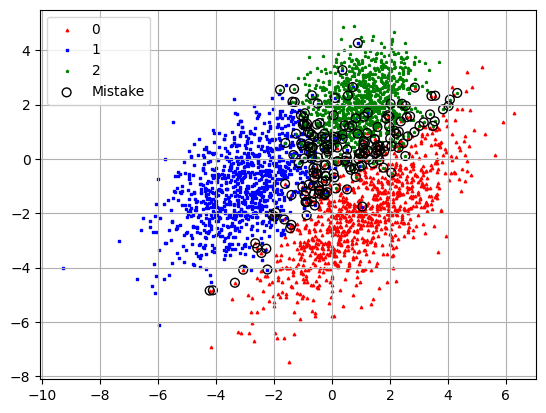

In [7]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений трех классов
r1 = 0.7
D1 = 3.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-3, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

r3 = 0.3
D3 = 1.0
mean3 = [1, 2]
V3 = [[D3, D3 * r3], [D3 * r3, D3]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T
x3 = np.random.multivariate_normal(mean3, V3, N).T

x_train = np.hstack([x1, x2, x3]).T
y_train = np.hstack([np.zeros(N), np.ones(N), np.ones(N) * 2])

mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)
mm3 = np.mean(x3.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x3.T - mm3).T
VV3 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# параметры для гауссовского байесовского классификатора
Py1, Py2, Py3 = 0.2, 0.5, 0.3
L1, L2, L3 = 1, 1, 1

b = lambda x, v, m, l, py: np.log(l*py) - 0.5*(x-m) @ np.linalg.inv(v) @ (x-m).T - 0.5*np.log(np.linalg.det(v))

predict = []
for x in x_train:
    predict.append(np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2), b(x, VV3, mm3, L3, Py3)]))
    
Q = np.sum(predict != y_train)

import matplotlib.pyplot as plt

plt.scatter(x1.T[:,0], x1.T[:,1], marker="^", s=3, c="red", label="0")

plt.scatter(x2.T[:,0], x2.T[:,1], marker="s", s=3, c="blue", label="1")

plt.scatter(x3.T[:,0], x3.T[:,1], marker="*", s=3, c="green", label="2")

plt.scatter(x_train[predict != y_train][:,0], x_train[predict != y_train][:,1], facecolor="None", edgecolors="black", s=40, label="Mistake")

plt.grid(True)

plt.legend()

plt.show()

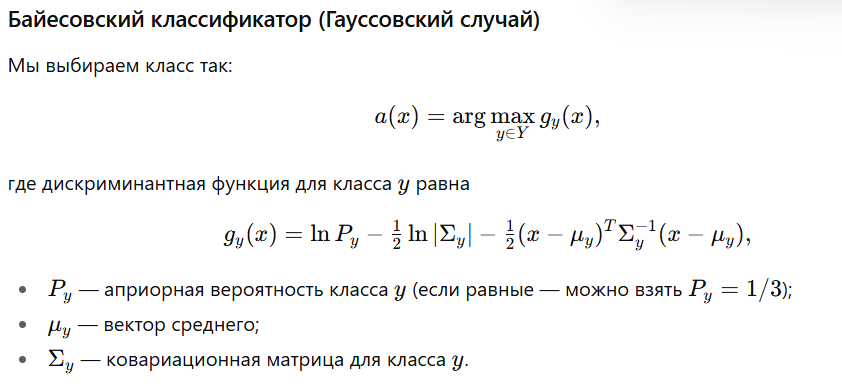